In [1]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import manifold, model_selection, ensemble
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

/home/vita/data/prog/lions-den-final-2018/env/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [152]:
data = pd.read_csv("../data/LionsDen.csv",sep=";")

print("Are there NaN values? ", data.isna().any().any())




data.head(40)

Are there NaN values?  True


,Unnamed: 0,CUSTOMER_ID,APPLICATION_ID,DEFAULT_FLAG,APPLICATION_DATE,APPLICATION_HOUR,APPLICATION_WEEKDAY,APPLICATION_MONTH,APPLICATION_YEAR,PRODUCT_GROUP,...,DPD,DPD_FALL_IN_12M,BIK_NUM_REQ_TOTAL_LZ3,BIK_NUM_REQ_TOTAL_LZ4_12,BIK_GRP,BIK_ACC_NUM_TOTAL_CLOSE,BIK_ACC_NUM_TOTAL_OPEN,BIK_BAL_TOTAL_OPEN,BIK_OVERDUE_12M_TOTAL_MAX,BIK_OVERDUE_EVER_TOTAL_MAX
0,1,102528122,362318345049,0,2017-05-10,07-24,3,5,2017,CASH LOAN,...,0.0,4.0,2,3,CREDIT HISTORY (FULL DATA),5.0,9.0,19250.0,0.0,0.0
1,2,146634735,635743726807,0,2016-01-09,07-24,7,1,2016,CASH LOAN,...,NaN,8.0,2,2,CREDIT HISTORY (FULL DATA),1.0,2.0,10950.0,0.0,3244.0
2,3,996453767,694627725843,0,2016-07-07,07-24,5,7,2016,OVERDRAFT,...,NaN,1.0,1,0,CREDIT HISTORY (FULL DATA),3.0,1.0,4650.0,67.0,67.0
3,4,816020174,989259535442,0,2016-07-20,07-24,3,7,2016,CASH LOAN,...,0.0,10.0,1,18,CREDIT HISTORY (FULL DATA),7.0,5.0,33300.0,0.0,1.0
4,5,930630805,77906299419,0,2015-06-30,07-24,3,6,2015,CASH LOAN,...,0.0,0.0,3,9,CREDIT HISTORY (PART DATA),13.0,2.0,3100.0,0.0,0.0
5,6,825946053,722597797738,0,2016-08-22,07-24,2,8,2016,CASH LOAN,...,0.0,1.0,2,3,CREDIT HISTORY (FULL DATA),2.0,1.0,1600.0,104.0,202.0
6,7,210093669,439756616689,0,2015-02-25,07-24,5,2,2015,OVERDRAFT,...,0.0,0.0,1,3,CREDIT HISTORY (FULL DATA),3.0,1.0,650.0,0.0,2701.0
7,8,917727391,815256620206,0,2016-01-13,07-24,3,1,2016,OVERDRAFT,...,NaN,NaN,1,2,CREDIT HISTORY (FULL DATA),4.0,0.0,0.0,0.0,4610.0
8,9,206449321,830001733652,0,2014-03-28,07-24,5,3,2014,CASH LOAN,...,0.0,0.0,3,2,CREDIT HISTORY (FULL DATA),1.0,1.0,1400.0,0.0,643.0
9,10,82185541,347404685965,0,2016-01-02,07-24,7,1,2016,CASH LOAN,...,0.0,7.0,1,1,CREDIT HISTORY (FULL DATA),3.0,2.0,11900.0,40.0,85.0


In [3]:
print("Is id unique? ",data.CUSTOMER_ID.is_unique)
print("Is application unique? ",data.APPLICATION_ID.is_unique)

Is id unique?  False
Is application unique?  True


In [180]:
data.describe()

,Unnamed: 0,CUSTOMER_ID,APPLICATION_ID,DEFAULT_FLAG,APPLICATION_WEEKDAY,APPLICATION_MONTH,APPLICATION_YEAR,LOAN_PERIOD,CREDIT_AMOUNT,COOP_PERIOD,...,DUE_AMOUNT,DPD,DPD_FALL_IN_12M,BIK_NUM_REQ_TOTAL_LZ3,BIK_NUM_REQ_TOTAL_LZ4_12,BIK_ACC_NUM_TOTAL_CLOSE,BIK_ACC_NUM_TOTAL_OPEN,BIK_BAL_TOTAL_OPEN,BIK_OVERDUE_12M_TOTAL_MAX,BIK_OVERDUE_EVER_TOTAL_MAX
count,79155.000000,7.915500e+04,7.915500e+04,79155.000000,79155.000000,79155.000000,79155.000000,79155.000000,79155.000000,79155.000000,...,65876.000000,65876.000000,71972.000000,79155.000000,79155.000000,74222.000000,74222.000000,7.422200e+04,74222.000000,74222.000000
mean,39578.000000,5.011687e+08,4.994300e+11,0.042410,3.901270,6.807845,2015.938601,41.482774,4667.297075,98.584979,...,7.041563,1.007833,3.437851,2.511515,2.491542,6.885977,3.934777,2.508902e+04,138.406807,572.854356
std,22850.224616,2.879946e+08,2.890948e+11,0.201525,1.757579,3.328680,1.092482,35.390071,6685.304097,64.066750,...,72.581892,18.193063,3.445301,1.821091,2.715710,8.925993,3.395230,4.701492e+04,1492.918659,4628.737114
min,1.000000,8.245000e+03,3.686175e+06,0.000000,1.000000,1.000000,2014.000000,0.000000,200.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,19789.500000,2.530550e+08,2.490771e+11,0.000000,2.000000,4.000000,2015.000000,12.000000,900.000000,49.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,2.000000,3.050000e+03,0.000000,0.000000
50%,39578.000000,5.009870e+08,4.990683e+11,0.000000,4.000000,7.000000,2016.000000,30.000000,2100.000000,86.000000,...,0.000000,0.000000,2.000000,2.000000,2.000000,4.000000,3.000000,1.025000e+04,0.000000,13.000000
75%,59366.500000,7.519408e+08,7.504741e+11,0.000000,5.000000,10.000000,2017.000000,80.000000,4700.000000,135.000000,...,0.000000,0.000000,6.000000,3.000000,4.000000,9.000000,5.000000,2.630000e+04,44.750000,204.000000
max,79155.000000,9.999889e+08,9.999911e+11,1.000000,7.000000,12.000000,2017.000000,96.000000,57000.000000,548.000000,...,11370.000000,949.000000,12.000000,37.000000,52.000000,175.000000,44.000000,1.061300e+06,133067.000000,512783.000000


In [124]:
numeric = data.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64', 'bool'])
numeric.describe()

,Unnamed: 0,CUSTOMER_ID,APPLICATION_ID,DEFAULT_FLAG,APPLICATION_WEEKDAY,APPLICATION_MONTH,APPLICATION_YEAR,LOAN_PERIOD,CREDIT_AMOUNT,COOP_PERIOD,...,DUE_AMOUNT,DPD,DPD_FALL_IN_12M,BIK_NUM_REQ_TOTAL_LZ3,BIK_NUM_REQ_TOTAL_LZ4_12,BIK_ACC_NUM_TOTAL_CLOSE,BIK_ACC_NUM_TOTAL_OPEN,BIK_BAL_TOTAL_OPEN,BIK_OVERDUE_12M_TOTAL_MAX,BIK_OVERDUE_EVER_TOTAL_MAX
count,79155.000000,7.915500e+04,7.915500e+04,79155.000000,79155.000000,79155.000000,79155.000000,79155.000000,79155.000000,79155.000000,...,65876.000000,65876.000000,71972.000000,79155.000000,79155.000000,74222.000000,74222.000000,7.422200e+04,74222.000000,74222.000000
mean,39578.000000,5.011687e+08,4.994300e+11,0.042410,3.901270,6.807845,2015.938601,41.482774,4667.297075,98.584979,...,7.041563,1.007833,3.437851,2.511515,2.491542,6.885977,3.934777,2.508902e+04,138.406807,572.854356
std,22850.224616,2.879946e+08,2.890948e+11,0.201525,1.757579,3.328680,1.092482,35.390071,6685.304097,64.066750,...,72.581892,18.193063,3.445301,1.821091,2.715710,8.925993,3.395230,4.701492e+04,1492.918659,4628.737114
min,1.000000,8.245000e+03,3.686175e+06,0.000000,1.000000,1.000000,2014.000000,0.000000,200.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,19789.500000,2.530550e+08,2.490771e+11,0.000000,2.000000,4.000000,2015.000000,12.000000,900.000000,49.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,2.000000,3.050000e+03,0.000000,0.000000
50%,39578.000000,5.009870e+08,4.990683e+11,0.000000,4.000000,7.000000,2016.000000,30.000000,2100.000000,86.000000,...,0.000000,0.000000,2.000000,2.000000,2.000000,4.000000,3.000000,1.025000e+04,0.000000,13.000000
75%,59366.500000,7.519408e+08,7.504741e+11,0.000000,5.000000,10.000000,2017.000000,80.000000,4700.000000,135.000000,...,0.000000,0.000000,6.000000,3.000000,4.000000,9.000000,5.000000,2.630000e+04,44.750000,204.000000
max,79155.000000,9.999889e+08,9.999911e+11,1.000000,7.000000,12.000000,2017.000000,96.000000,57000.000000,548.000000,...,11370.000000,949.000000,12.000000,37.000000,52.000000,175.000000,44.000000,1.061300e+06,133067.000000,512783.000000


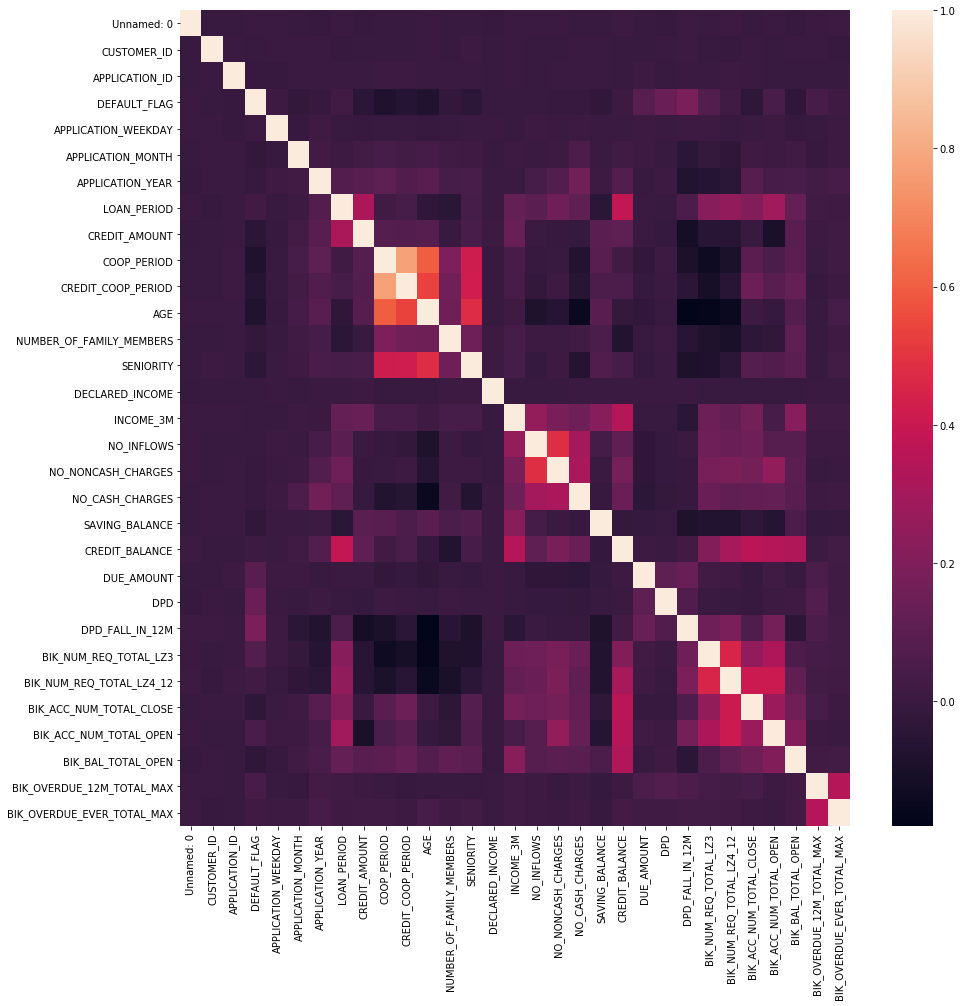

In [131]:
plt.figure(figsize=(15,15))
sns.heatmap(numeric.corr())
plt.show()

In [174]:
numeric.columns

Index(['Unnamed: 0', 'CUSTOMER_ID', 'APPLICATION_ID', 'DEFAULT_FLAG',
       'APPLICATION_WEEKDAY', 'APPLICATION_MONTH', 'APPLICATION_YEAR',
       'LOAN_PERIOD', 'CREDIT_AMOUNT', 'COOP_PERIOD', 'CREDIT_COOP_PERIOD',
       'AGE', 'NUMBER_OF_FAMILY_MEMBERS', 'SENIORITY', 'DECLARED_INCOME',
       'INCOME_3M', 'NO_INFLOWS', 'NO_NONCASH_CHARGES', 'NO_CASH_CHARGES',
       'SAVING_BALANCE', 'CREDIT_BALANCE', 'DUE_AMOUNT', 'DPD',
       'DPD_FALL_IN_12M', 'BIK_NUM_REQ_TOTAL_LZ3', 'BIK_NUM_REQ_TOTAL_LZ4_12',
       'BIK_ACC_NUM_TOTAL_CLOSE', 'BIK_ACC_NUM_TOTAL_OPEN',
       'BIK_BAL_TOTAL_OPEN', 'BIK_OVERDUE_12M_TOTAL_MAX',
       'BIK_OVERDUE_EVER_TOTAL_MAX'],
      dtype='object')

In [132]:
numeric.corr()["DEFAULT_FLAG"].abs().sort_values(ascending=False)

DEFAULT_FLAG                  1.000000
DPD_FALL_IN_12M               0.185564
DPD                           0.140305
DUE_AMOUNT                    0.088726
COOP_PERIOD                   0.082117
AGE                           0.078120
BIK_NUM_REQ_TOTAL_LZ3         0.070083
CREDIT_COOP_PERIOD            0.064171
BIK_ACC_NUM_TOTAL_OPEN        0.047393
CREDIT_AMOUNT                 0.044812
BIK_OVERDUE_12M_TOTAL_MAX     0.043629
SENIORITY                     0.038406
BIK_ACC_NUM_TOTAL_CLOSE       0.035434
BIK_BAL_TOTAL_OPEN            0.028882
SAVING_BALANCE                0.023876
LOAN_PERIOD                   0.022910
NUMBER_OF_FAMILY_MEMBERS      0.022655
BIK_NUM_REQ_TOTAL_LZ4_12      0.021004
APPLICATION_MONTH             0.019152
BIK_OVERDUE_EVER_TOTAL_MAX    0.014444
APPLICATION_WEEKDAY           0.011287
NO_CASH_CHARGES               0.009491
NO_NONCASH_CHARGES            0.008412
APPLICATION_ID                0.008106
CREDIT_BALANCE                0.006030
APPLICATION_YEAR         

## Missing data

In [159]:
nan_nonnan = data.notnull().astype('int')
nan_nonnan.describe()

,Unnamed: 0,CUSTOMER_ID,APPLICATION_ID,DEFAULT_FLAG,APPLICATION_DATE,APPLICATION_HOUR,APPLICATION_WEEKDAY,APPLICATION_MONTH,APPLICATION_YEAR,PRODUCT_GROUP,...,DPD,DPD_FALL_IN_12M,BIK_NUM_REQ_TOTAL_LZ3,BIK_NUM_REQ_TOTAL_LZ4_12,BIK_GRP,BIK_ACC_NUM_TOTAL_CLOSE,BIK_ACC_NUM_TOTAL_OPEN,BIK_BAL_TOTAL_OPEN,BIK_OVERDUE_12M_TOTAL_MAX,BIK_OVERDUE_EVER_TOTAL_MAX
count,79155.0,79155.0,79155.0,79155.0,79155.0,79155.0,79155.0,79155.0,79155.0,79155.0,...,79155.000000,79155.000000,79155.0,79155.0,79155.0,79155.000000,79155.000000,79155.000000,79155.000000,79155.000000
mean,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.832241,0.909254,1.0,1.0,1.0,0.937679,0.937679,0.937679,0.937679,0.937679
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.373655,0.287249,0.0,0.0,0.0,0.241739,0.241739,0.241739,0.241739,0.241739
min,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.000000,0.000000,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.000000,1.000000,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.000000,1.000000,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000
75%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.000000,1.000000,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.000000,1.000000,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


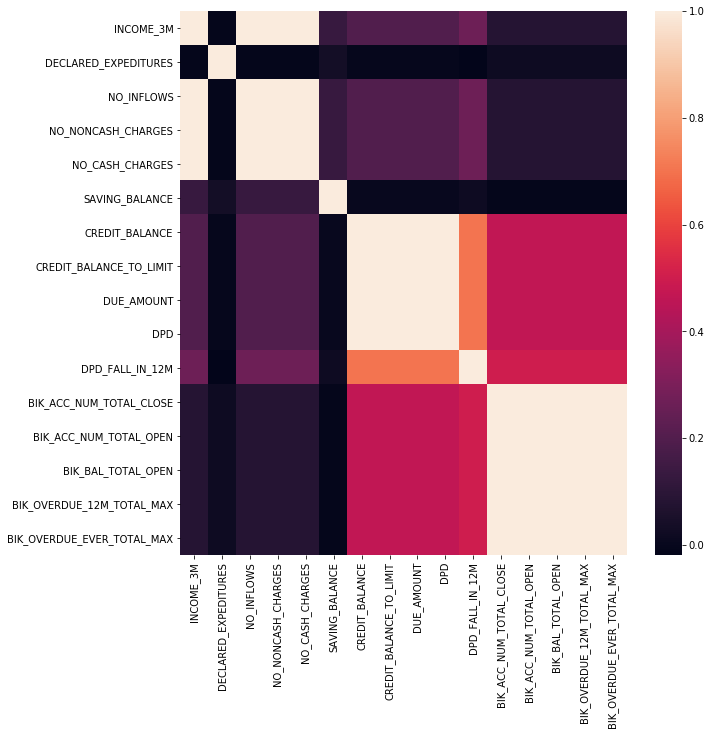

In [169]:
nan_nonnan = nan_nonnan.loc[:, (nan_nonnan != 1).any(axis=0)] # drop columns where everything is 1
plt.figure(figsize=(10,10))
sns.heatmap(nan_nonnan.corr())
plt.show()

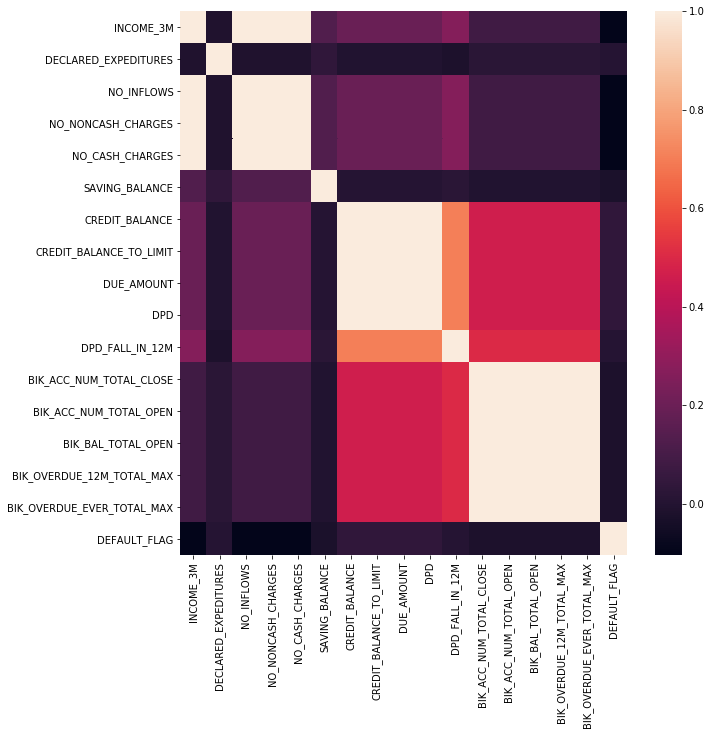

In [171]:
nan_nonnan["DEFAULT_FLAG"] = numeric["DEFAULT_FLAG"]
plt.figure(figsize=(10,10))
sns.heatmap(nan_nonnan.corr())
plt.show()

In [173]:
nan_nonnan.corr()["DEFAULT_FLAG"].abs().sort_values(ascending=False)

DEFAULT_FLAG                  1.000000
NO_CASH_CHARGES               0.103599
NO_INFLOWS                    0.103599
NO_NONCASH_CHARGES            0.103599
INCOME_3M                     0.103599
DPD                           0.036100
CREDIT_BALANCE_TO_LIMIT       0.036100
CREDIT_BALANCE                0.036100
DUE_AMOUNT                    0.036100
SAVING_BALANCE                0.021836
BIK_ACC_NUM_TOTAL_CLOSE       0.017580
BIK_OVERDUE_EVER_TOTAL_MAX    0.017580
BIK_ACC_NUM_TOTAL_OPEN        0.017580
BIK_BAL_TOTAL_OPEN            0.017580
BIK_OVERDUE_12M_TOTAL_MAX     0.017580
DPD_FALL_IN_12M               0.008432
DECLARED_EXPEDITURES          0.007309
Name: DEFAULT_FLAG, dtype: float64

## Dependencies

In [145]:
def dependency(df, c_from, c_agg, logx=False):
    df = df[[c_from, c_agg]].dropna().sort_values(by=c_from)
    df = df.groupby(c_from).agg(["mean", "count"])
    df.columns = [c_from, "count"]
    
    ax1 = df["count"].plot(color="c", logx=logx)
    ax1.set_ylabel("count", color="c")
    
    ax2 = ax1.twinx()
    ax2.set_ylabel(c_agg, color="orange")
    ax2.plot(df[c_from], color="orange")

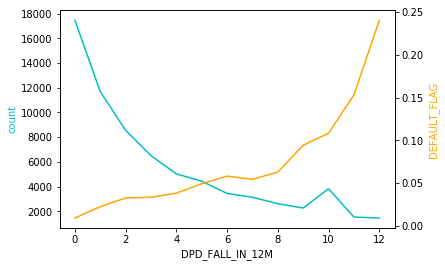

In [107]:
dependency(numeric, "DPD_FALL_IN_12M", "DEFAULT_FLAG")

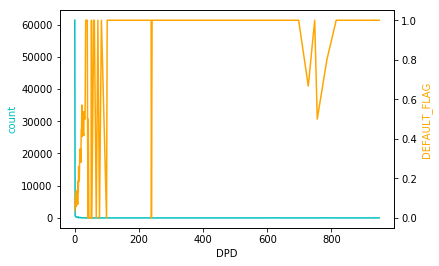

In [146]:
dependency(numeric, "DPD", "DEFAULT_FLAG")

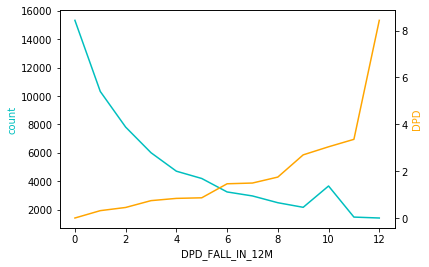

In [147]:
dependency(numeric, "DPD_FALL_IN_12M", "DPD")

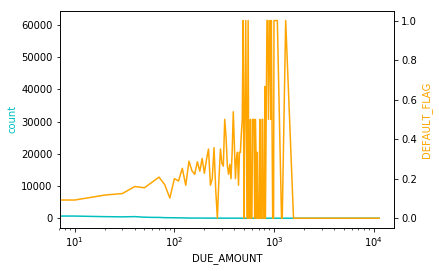

In [151]:
dependency(numeric, "DUE_AMOUNT", "DEFAULT_FLAG", logx=True)

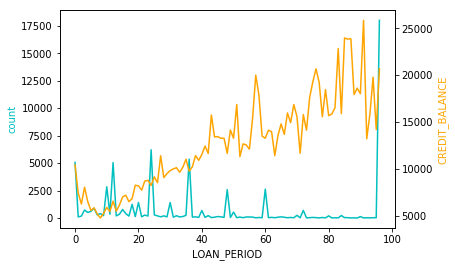

In [128]:
dependency(numeric, "LOAN_PERIOD", "CREDIT_BALANCE")

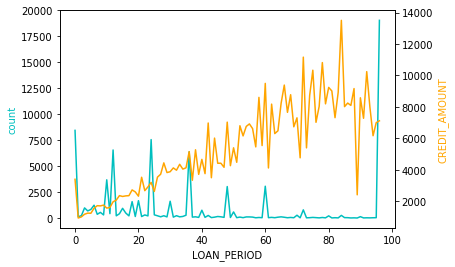

In [129]:
dependency(numeric, "LOAN_PERIOD", "CREDIT_AMOUNT")

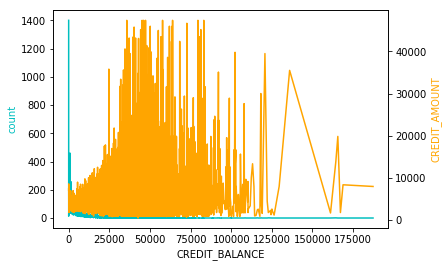

In [130]:
dependency(numeric, "CREDIT_BALANCE", "CREDIT_AMOUNT")

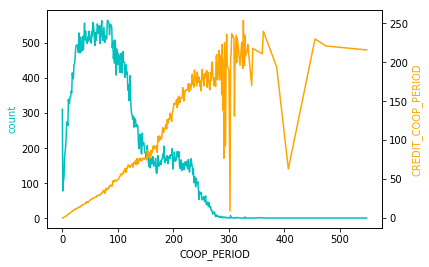

In [109]:
dependency(numeric, "COOP_PERIOD", "CREDIT_COOP_PERIOD")

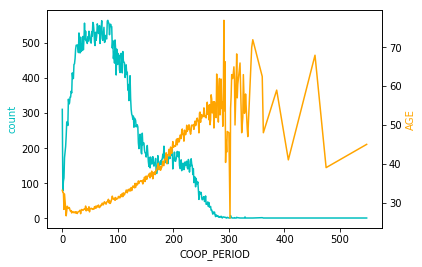

In [110]:
dependency(numeric, "COOP_PERIOD", "AGE")

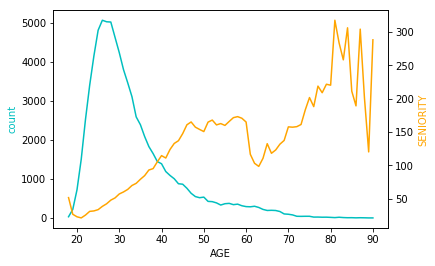

In [123]:
dependency(numeric, "AGE", "SENIORITY")

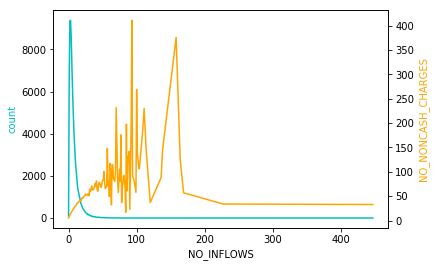

In [125]:
dependency(numeric, "NO_INFLOWS", "NO_NONCASH_CHARGES")

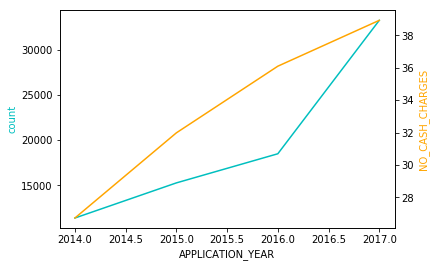

In [177]:
dependency(numeric, "APPLICATION_YEAR", "NO_CASH_CHARGES")

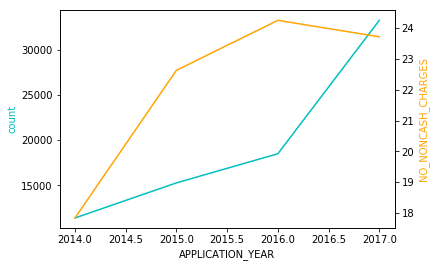

In [178]:
dependency(numeric, "APPLICATION_YEAR", "NO_NONCASH_CHARGES")